In [0]:
!wget https://www.dropbox.com/s/486li09u91zyjdm/db_train.raw?dl=1
!wget https://www.dropbox.com/s/d2hsorvtla3rtf9/label_2019_train.txt?dl=1
!wget https://www.dropbox.com/s/qonk627t2557utz/db_val.raw?dl=1

!mv db_train.raw?dl=1 db_train.raw
!mv db_val.raw?dl=1 db_val.raw
!mv label_2019_train.txt?dl=1 label_2019_train.txt

--2019-03-12 17:09:36--  https://www.dropbox.com/s/486li09u91zyjdm/db_train.raw?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/486li09u91zyjdm/db_train.raw [following]
--2019-03-12 17:09:37--  https://www.dropbox.com/s/dl/486li09u91zyjdm/db_train.raw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c80d7597bbe86f27b2c1a692e.dl.dropboxusercontent.com/cd/0/get/Ac8dcS_328ujIyBdMcOcd6DWnc4Lt3AncghN6SnLe-DuL1bYGurGu16Ptt7OWfxyLnbbmP5dxcC7q31LPeeB6-DRWddsyTtLZXHLvHH-wmdL_mAE5SxQLWtwnjNa4uFlXjo/file?dl=1# [following]
--2019-03-12 17:09:37--  https://uc7c80d7597bbe86f27b2c1a692e.dl.dropboxusercontent.com/cd/0/get/Ac8dcS_328ujIyBdMcOcd6DWnc4Lt3AncghN6SnLe-DuL1bYGurGu16Ptt7OWfxyLnbbmP5dxcC7q31LPeeB6-DRWddsyTtLZXHLvHH-wmdL_

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_images_fname = 'db_train.raw'
train_labels_fname = 'label_2019_train.txt'

val_images_fname    = 'db_val.raw'


# number of images
num_train_images = 116157
num_valid_images = 27013


# size of the images 56*56 pixels in gray levels
image_dim = 56 * 56 * 3

train_images_label = np.loadtxt(train_labels_fname, dtype=np.float64)

with open(train_images_fname, 'rb') as f:
    train_images_data = np.fromfile(f, dtype=np.uint8, count=num_train_images * image_dim).astype(float)/255
    train_images_data = train_images_data.reshape(num_train_images, image_dim)
    
# with open(val_images_fname, 'rb') as f:
#     val_images_data = np.fromfile(f, dtype=np.uint8, count=num_valid_images * image_dim).astype(float)/255
#     val_images_data = val_images_data.reshape(num_valid_images, image_dim)

In [0]:
train_images_data[:100][train_images_label[:100]==1]

In [0]:
def plot_gallery(images, n_row=4, n_col=8, title= 'gallery'):
    n_components = n_row * n_col
    image_shape = (56, 56,3)
    images = images[:n_components]
    """Plot images as gallery"""
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp < 0)
        if len(dmy[0]) > 0:
            yz, xz = dmy
        comp[comp < 0] = 0

        plt.imshow(comp, cmap=plt.cm.gray, vmax=vmax, vmin=vmin)

        if len(dmy[0]) > 0:
            plt.plot(xz, yz, 'r,', hold=True)
            print(len(dmy[0]), "negative-valued pixels")

        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

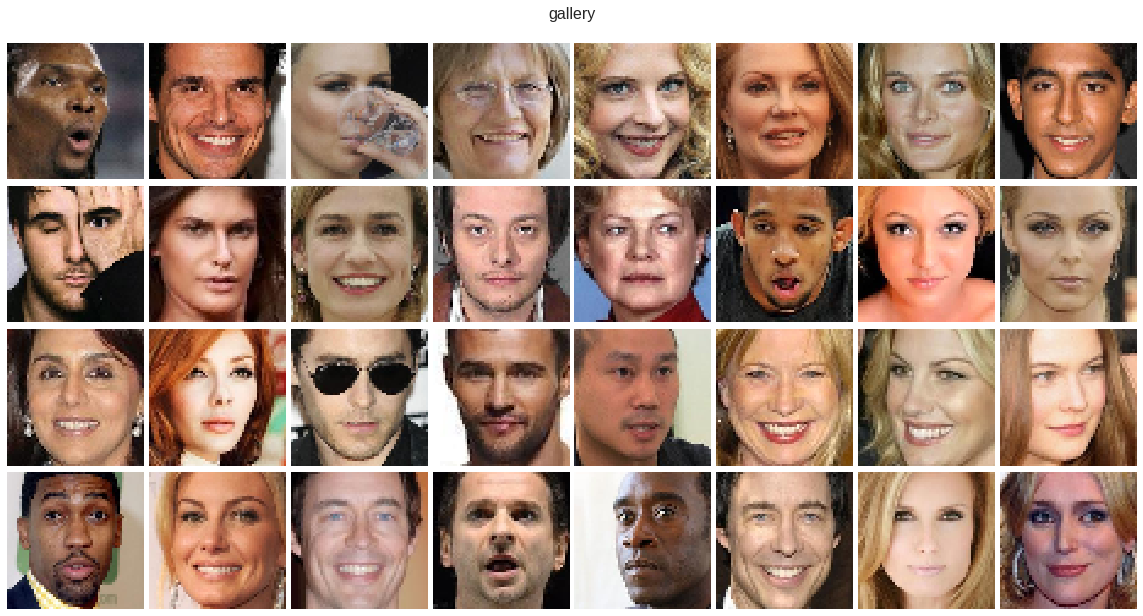

In [0]:
l = np.random.choice(range(len(train_images_data)), 200)
plot_gallery(train_images_data[l][train_images_label[l]==1])

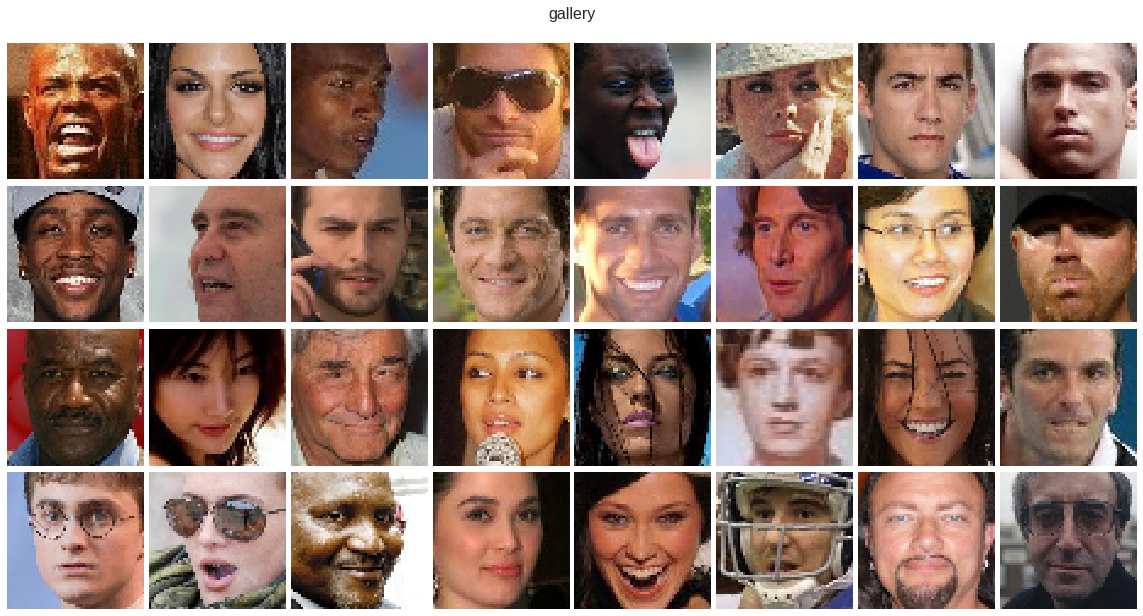

In [0]:
l = np.random.choice(range(len(train_images_data)), 200)
plot_gallery(train_images_data[l][train_images_label[l]==0])

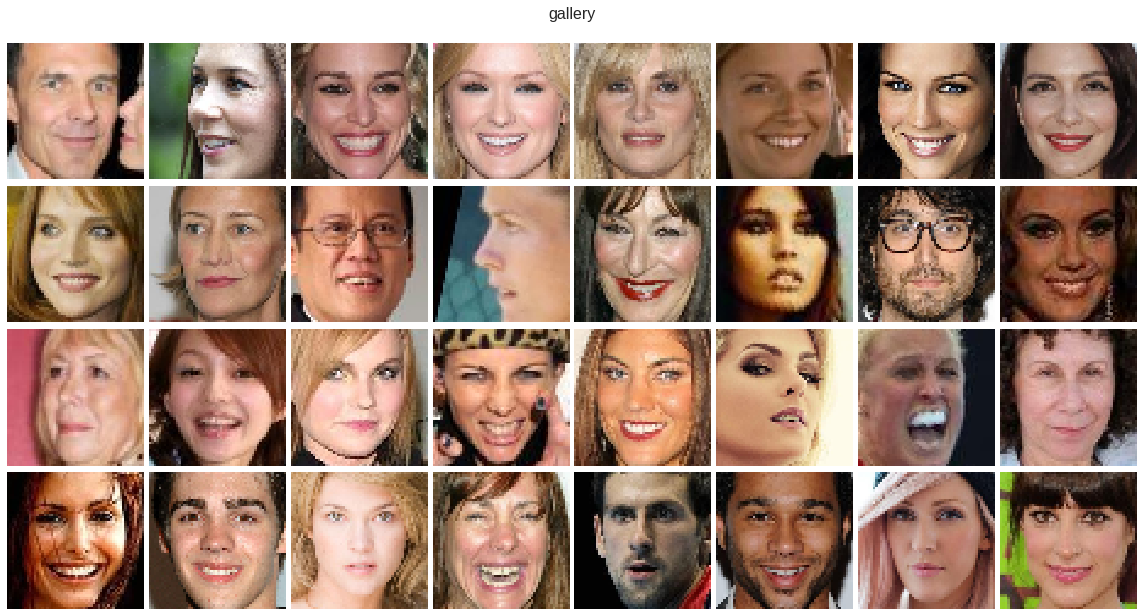

In [0]:
l = np.random.choice(range(len(train_images_data)), 200)
plot_gallery(train_images_data[l][train_images_label[l]==1])

In [0]:
pred = train_images_label[44572:44572+27013]

In [0]:
train_images_label.mean()

0.5930593937515604

In [0]:
np.savetxt("val_pred.txt", pred, fmt="%d")

In [0]:
for i in range(2):
  print([all(x == val_images_data[i]) for x in list(train_images_data)].index(True))

44572
44573


In [0]:
val_images_data.shape

(27013, 9408)

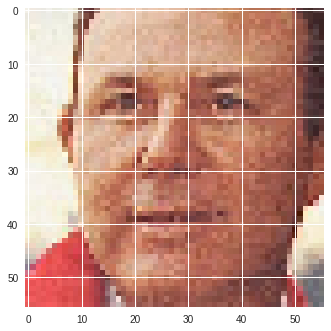

In [0]:
plt.imshow(train_images_data[44572].reshape((56,56,3)))

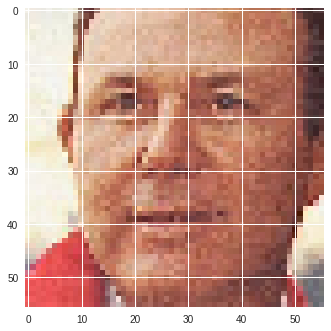

In [0]:
plt.imshow(val_images_data[0].reshape((56,56,3)))

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit()

In [0]:
from sklearn.manifold import TSNE